In [1]:
import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as itpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import pandas as pd
import os
import glob
import cv2
import imageio
from PIL import Image
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
from pyclustering.cluster import gmeans, xmeans
import plotly.express as px
import plotly.graph_objects as go
import itertools
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 

# plot contribution rate

In [ ]:
df = pd.read_excel('out/contribution_rate.xlsx')
# print(df.head(6))
cont_rate = np.array(df.iloc[2:, 30], dtype='float32')
print(cont_rate)

In [ ]:
x = np.arange(0, 80, 1)
plt.plot(x, cont_rate)
plt.ylim(0, 1.)
plt.yticks([ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.grid(which = "major", axis = "y", alpha = 0.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('results/figure/contribution_rate.png')
plt.show()

# Calcurating distance

In [ ]:
param = np.load('datasets/question-20~20/param.npy')
df = pd.read_excel('questionnaire/inspector.xlsx')
print(df.head(6))
# evaluation = np.array(df.iloc[:, 1], dtype='float32')
# print(evaluation)

In [ ]:
point1 = []
point2 = []
point3 = []
point4 = []
point5 = []

for i in range(M):
    if(evaluation[i]==1):
        point1.append(dist[i]) 
    elif(evaluation[i]==2):
        point2.append(dist[i])
    elif(evaluation[i]==3):
        point3.append(dist[i])
    elif(evaluation[i]==4):
        point4.append(dist[i])
    elif(evaluation[i]==5):
        point5.append(dist[i])
        
point1 = np.array(point1)
point2 = np.array(point2)
point3 = np.array(point3)
point4 = np.array(point4)
point5 = np.array(point5)

point1_ave = np.mean(point1)
point2_ave = np.mean(point2)
point3_ave = np.mean(point3)
point4_ave = np.mean(point4)
point5_ave = np.mean(point5)

point5_std = np.std(point5)
point1_std = np.std(point1)
point2_std = np.std(point2)
point3_std = np.std(point3)
point4_std = np.std(point4)

print(point1_ave)
print(point2_ave)
print(point3_ave)
print(point4_ave)
print(point5_ave)

print(point1_std)
print(point2_std)
print(point3_std)
print(point4_std)
print(point5_std)

In [ ]:
M = 2000
comp = 80
inspector = 'C'

x = param[:M, :comp]

best = []
worst = []
best_dist = []
worst_dist = []
dist = []

if (comp==8):
    if (inspector == 'A'):
        best.append(x[1096])
        best.append(x[1035])
        best.append(x[1840])
        best.append(x[960])
        best.append(x[169])
        worst.append(x[1703])
        worst.append(x[153])
        worst.append(x[1052])
        worst.append(x[444])
        worst.append(x[149])

    elif (inspector == 'B'):
        best.append(x[1096])
        best.append(x[169])
        best.append(x[1978])
        best.append(x[349])
        best.append(x[1035])
        worst.append(x[1703])
        worst.append(x[548])
        worst.append(x[481])
        worst.append(x[1423])
        worst.append(x[1588])

    elif (inspector == 'C'):
        best.append(x[1083])
        best.append(x[1725])
        best.append(x[1035])
        best.append(x[503])
        best.append(x[1096])
        worst.append(x[444])
        worst.append(x[626])
        worst.append(x[149])
        worst.append(x[1388])
        worst.append(x[153])
        
elif(comp==80):
    if (inspector == 'A'):
        best.append(x[36])
        best.append(x[162])
        best.append(x[281])
        best.append(x[1083])
        best.append(x[1035])
        worst.append(x[1394])
        worst.append(x[1044])
        worst.append(x[123])
        worst.append(x[1172])
        worst.append(x[1534])

    elif (inspector == 'B'):
        best.append(x[939])
        best.append(x[1690])
        best.append(x[844])
        best.append(x[363])
        best.append(x[336])
        worst.append(x[586])
        worst.append(x[769])
        worst.append(x[1431])
        worst.append(x[1370])
        worst.append(x[974])

    elif (inspector == 'C'):
        best.append(x[1083])
        best.append(x[1035])
        best.append(x[1898])
        best.append(x[162])
        best.append(x[281])
        worst.append(x[1394])
        worst.append(x[405])
        worst.append(x[123])
        worst.append(x[1269])
        worst.append(x[1044])    
    
best = np.array(best)
worst = np.array(worst)

for i in range(5):
    for j in range(5):
        best_dist.append(np.linalg.norm(best[i]-best[j], ord=2))
        worst_dist.append(np.linalg.norm(worst[i]-worst[j], ord=2))
        dist.append(np.linalg.norm(best[i]-worst[j], ord=2))


best_dist = np.array(best_dist)
worst_dist = np.array(worst_dist)
dist = np.array(dist)

best_dist_mean = np.mean(best_dist)
worst_dist_mean = np.mean(worst_dist)
dist_mean = np.mean(dist)

best_dist_std = np.std(best_dist)
worst_dist_std = np.std(worst_dist)
dist_std = np.std(dist)

print('inspector:', inspector)
print('comp:', comp)

print('mean')
print('best', best_dist_mean)
print('worst', worst_dist_mean)
print('best-worst', dist_mean)

print('std')
print('best', best_dist_std)
print('worst', worst_dist_std)
print('best-worst', dist_std)


# Optimization

In [2]:
def normalization(x, axis=None):
    x_min = x.min(axis=axis, keepdims=True)
    x_max = x.max(axis=axis, keepdims=True)
    norm = (x-x_min)/(x_max-x_min)
    
    return norm

def normalization2(x, y, axis=None):
    y_min = y.min(axis=axis, keepdims=True)
    y_max = y.max(axis=axis, keepdims=True)
    norm = (x-y_min)/(y_max-y_min)

    return norm

def simultaneous_equations(M, comp, nearest, w, param, evaluation):
    A = np.zeros((M,M))
    d = np.zeros(M)
    dist = np.empty((M,M))
    L = np.zeros((M,M))
    
    # A,d作成
    for i in range(M):
        if(i%2==0):
            A[i, i] = 1
            A[i, i+1] = -1
            if(evaluation[int(i/2)]==1): d[i] = 1.
            elif(evaluation[int(i/2)]==2): d[i] = 0.5
            elif(evaluation[int(i/2)]==3): d[i] = 0.
            elif(evaluation[int(i/2)]==4): d[i] = -0.5
            elif(evaluation[int(i/2)]==5): d[i] = -1.
    
    # x作成
    x = param[:M, :comp]
    
    # L作成
    for i in range(M):
        for j in range(M):
            dist[i][j] = np.linalg.norm(x[i]-x[j], ord=2)

    for i in range(M):
        for j in range(1, nearest+1):
            index = np.where(dist[i]==np.sort(dist[i])[j])
            L[i][index[0][0]] = -1
            L[index[0][0]][i] = -1
            
    for i in range(M):
        L[i][i] = np.count_nonzero(L[i])

#     print('A\n',A)
#     print('d\n',d)
#     print('x\n',x)
#     print('L\n',L)
    
    AA = np.dot(A.T, A) + w * np.dot(L.T, L)
    b = np.dot(A.T, d)
    
    return x, AA, b

def calc_equations(AA, b, method):
    
    # メソッドなし
    if(method=='non_method'):
        AA_inv = np.linalg.inv(AA)
        y = np.dot(AA_inv, b)
        # print('non_method\n', y)
    
    # linalgメソッド
    elif(method=='linalg'):
        y = np.linalg.solve(AA, b)
        # print('linalg\n', y)
        
    # LU分解
    elif(method=='lu'):
        LU = linalg.lu_factor(AA)
        y = linalg.lu_solve(LU, b)
        # print('lu\n', y)
        
    # QR分解
    elif(method=='qr'):
        Q, R = linalg.qr(AA)
        t = np.dot(Q.T, b)
        y = linalg.solve(R, t)
        # print('qr\n', y)
        
    # コレスキー分解
    elif(method=='cholesky'):
        LL = np.linalg.cholesky(AA)
        t = np.linalg.solve(LL, b)
        y = np.linalg.solve(LL.T.conj(), t)
        # print('cholesky\n', y)
        
    else:print('select method')
        
    return y

def show_estimate(y):
    y_norm = normalization(y)
    y_sort = np.sort(y)
    for i in range(1,6):
        index = np.where(y==y_sort[-i])
        print('best{}:{}, {}'.format(i, y_norm[index], index))
        plt.imshow(images[index[0][0]])
        plt.show()
    for i in range(0,5):
        index = np.where(y==y_sort[i])
        print('worst{}:{}, {}'.format(i+1, y_norm[index], index))
        plt.imshow(images[index[0][0]])
        plt.show()
#     for i in range(y.shape[0]):
#         print('{:>3}: {:4f}'.format(i, y_norm[i]))

def prepare_datapoint(M, comp, y):
    y_norm = normalization(y)
    
    for i in range(comp):
        if(i==0): y_app = y_norm
        else: y_app = np.append(y_app, y_norm)
        
    # print(y_app.shape)
    # print(y_app)

    y_reshape = y_app.reshape([M,comp], order='F')
    # print(y_reshape.shape)
    # print(y_reshape)
    
    return y_reshape

def estimate_test(comp, x, datapoint, test):
    rbf_methods = ['multiquadric', 'inverse', 'gaussian', 'cubic', 'quintic', 'thin_plate']
    
    
    if(comp==3):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}
        
    elif(comp==4):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}
        
    elif(comp==8):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5], test[:,6], test[:,7]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}

    elif(comp==17):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7], x[:,8], x[:,9], 
                                                            x[:,10], x[:,11], x[:,12], x[:,13], x[:,14], x[:,15], x[:,16], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5], test[:,6], test[:,7],test[:,8], test[:,9], 
                                     test[:,10], test[:,11], test[:,12], test[:,13], test[:,14], test[:,15], test[:,16]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}        
        
    elif(comp==25):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7], x[:,8], x[:,9], 
                                                            x[:,10], x[:,11], x[:,12], x[:,13], x[:,14], x[:,15], x[:,16], x[:,17], x[:,18], x[:,19],
                                                            x[:,20], x[:,21], x[:,22], x[:,23], x[:,24], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5], test[:,6], test[:,7],test[:,8], test[:,9], 
                                     test[:,10], test[:,11], test[:,12], test[:,13], test[:,14], test[:,15], test[:,16], test[:,17],test[:,18], test[:,19],
                                     test[:,20], test[:,21], test[:,22], test[:,23], test[:,24]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}
        
    elif(comp==55):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7], x[:,8], x[:,9], 
                                                            x[:,10], x[:,11], x[:,12], x[:,13], x[:,14], x[:,15], x[:,16], x[:,17], x[:,18], x[:,19],
                                                            x[:,20], x[:,21], x[:,22], x[:,23], x[:,24], x[:,25], x[:,26], x[:,27], x[:,28], x[:,29],
                                                            x[:,30], x[:,31], x[:,32], x[:,33], x[:,34], x[:,35], x[:,36], x[:,37], x[:,38], x[:,39],
                                                            x[:,40], x[:,41], x[:,42], x[:,43], x[:,44], x[:,45], x[:,46], x[:,47], x[:,48], x[:,49],
                                                            x[:,50], x[:,51], x[:,52], x[:,53], x[:,54], s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5], test[:,6], test[:,7],test[:,8], test[:,9], 
                                     test[:,10], test[:,11], test[:,12], test[:,13], test[:,14], test[:,15], test[:,16], test[:,17],test[:,18], test[:,19],
                                     test[:,20], test[:,21], test[:,22], test[:,23], test[:,24], test[:,25], test[:,26], test[:,27],test[:,28], test[:,29],
                                     test[:,30], test[:,31], test[:,32], test[:,33], test[:,34], test[:,35], test[:,36], test[:,37],test[:,38], test[:,39],
                                     test[:,40], test[:,41], test[:,42], test[:,43], test[:,44], test[:,45], test[:,46], test[:,47],test[:,48], test[:,49],
                                     test[:,50], test[:,51], test[:,52], test[:,53], test[:,54]) for f in r_fs[m]], (1, 0)) for m in rbf_methods}

    elif(comp==80):
        r_fs = {m : np.apply_along_axis(lambda s : itpl.Rbf(x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7], x[:,8], x[:,9], 
                                                            x[:,10], x[:,11], x[:,12], x[:,13], x[:,14], x[:,15], x[:,16], x[:,17], x[:,18], x[:,19],
                                                            x[:,20], x[:,21], x[:,22], x[:,23], x[:,24], x[:,25], x[:,26], x[:,27], x[:,28], x[:,29],
                                                            x[:,30], x[:,31], x[:,32], x[:,33], x[:,34], x[:,35], x[:,36], x[:,37], x[:,38], x[:,39],
                                                            x[:,40], x[:,41], x[:,42], x[:,43], x[:,44], x[:,45], x[:,46], x[:,47], x[:,48], x[:,49],
                                                            x[:,50], x[:,51], x[:,52], x[:,53], x[:,54], x[:,55], x[:,56], x[:,57], x[:,58], x[:,59],
                                                            x[:,60], x[:,61], x[:,62], x[:,63], x[:,64], x[:,65], x[:,66], x[:,67], x[:,68], x[:,69],
                                                            x[:,70], x[:,71], x[:,72], x[:,73], x[:,74], x[:,75], x[:,76], x[:,77], x[:,78], x[:,79],
                                                            s, function=m), 0, datapoint) for m in rbf_methods}
        r_yis = {m : np.transpose([f(test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5], test[:,6], test[:,7],test[:,8], test[:,9], 
                                     test[:,10], test[:,11], test[:,12], test[:,13], test[:,14], test[:,15], test[:,16], test[:,17],test[:,18], test[:,19],
                                     test[:,20], test[:,21], test[:,22], test[:,23], test[:,24], test[:,25], test[:,26], test[:,27],test[:,28], test[:,29],
                                     test[:,30], test[:,31], test[:,32], test[:,33], test[:,34], test[:,35], test[:,36], test[:,37],test[:,38], test[:,39],
                                     test[:,40], test[:,41], test[:,42], test[:,43], test[:,44], test[:,45], test[:,46], test[:,47],test[:,48], test[:,49],
                                     test[:,50], test[:,51], test[:,52], test[:,53], test[:,54], test[:,55], test[:,56], test[:,57],test[:,58], test[:,59],
                                     test[:,60], test[:,61], test[:,62], test[:,63], test[:,64], test[:,65], test[:,66], test[:,67],test[:,68], test[:,69],
                                     test[:,70], test[:,71], test[:,72], test[:,73], test[:,74], test[:,75], test[:,76], test[:,77],test[:,78], test[:,79],
                                    ) for f in r_fs[m]], (1, 0)) for m in rbf_methods}
    else:print('select comp')
#     for m in rbf_methods:
#         print(m)
#     for i in range(test_size):
#         print(i, r_yis['thin_plate'][i][0])
        
    return r_yis['thin_plate']

def calc_anomaly_score(good_scores):
    anomaly_scores = np.empty(good_scores.shape[0])
    for i in range(good_scores.shape[0]):
        anomaly_scores[i] = -1*good_scores[i][0]+1
        
    return anomaly_scores

## Loading images

In [ ]:
images = []
for i in range(0, 2000):
    image = cv2.imread('datasets/question-20~20/{0:05d}.png'.format(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

images  = np.array(images)
print(images.shape)

## Loding parameter

In [3]:
param = np.load('datasets/question-20~20/param.npy')
df = pd.read_excel('questionnaire/inspector.xlsx')
print(df.head(6))
evaluation = np.array(df.iloc[:, 2], dtype='float32')
print(evaluation)

   A  B  C   average  average_round  majority  majority_corr  Unnamed: 7
0  1  1  2  1.333333              1       1.0              1           0
1  1  1  2  1.333333              1       1.0              1           0
2  1  5  2  2.666667              3       NaN              3           0
3  1  5  1  2.333333              2       1.0              1           1
4  3  5  3  3.666667              4       3.0              3           1
5  1  3  4  2.666667              3       NaN              3           0
[2. 2. 2. 1. 3. 4. 3. 4. 2. 2. 3. 3. 4. 4. 4. 4. 2. 4. 2. 4. 2. 2. 3. 3.
 2. 3. 4. 3. 4. 3. 4. 2. 3. 3. 4. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 2. 1. 2.
 1. 3. 5. 5. 4. 4. 4. 3. 2. 2. 3. 2. 4. 2. 4. 2. 2. 2. 3. 5. 4. 3. 2. 4.
 4. 4. 2. 3. 2. 4. 2. 3. 4. 3. 2. 2. 4. 3. 3. 4. 3. 4. 2. 2. 4. 5. 2. 3.
 5. 3. 5. 2. 3. 4. 3. 4. 3. 2. 4. 4. 2. 3. 3. 2. 3. 2. 3. 5. 5. 3. 3. 4.
 4. 2. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 3. 3. 2. 3. 2. 2. 3. 3. 4. 3. 2. 2.
 3. 4. 2. 3. 3. 3. 4. 2. 3. 3. 3. 2. 2. 4. 2. 2. 4.

In [6]:
M = 2000
comp = 8 # 3,4,8,25,55,80
nearest = 20
w = 5

x, AA, b = simultaneous_equations(M, comp, nearest, w, param, evaluation)
y = calc_equations(AA, b, method='lu')
datapoint = prepare_datapoint(M, comp, y)
test = param[:, :comp]
x_norm = normalization(x)
test_norm = normalization2(test, x)
good_scores = estimate_test(comp, x_norm, datapoint, test_norm)
scores = calc_anomaly_score(good_scores)

In [7]:
top = []
low = []
mix = []
labels = []

for i in range(good_scores.shape[0]):
    top.append(test[i])
    labels.append(good_scores[i][0])

top = np.array(top)
labels = np.array(labels)

print(len(top))

10000


## Plot

In [ ]:
# color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black']
color = ['black', 'tab:gray', 'tab:brown',  'tab:purple', 'tab:blue', 'tab:cyan','tab:green', 'tab:olive', 'tab:orange', 'tab:red', 'tab:red']
# plt.figure(figsize=(4.8, 4.8))
for i in range(len(top)):
    plt.scatter(test[i,0], test[i,1], c=color[int(labels[i]*10)])
plt.xlabel('d 1')
plt.ylabel('d 2')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
# plt.savefig('results/distribution/C_comp8_d1d2_2.png')
plt.show()

In [ ]:
# color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black']
color = cm.RdYlBu(np.linspace(0, 1, 11))
# plt.figure(figsize=(4.8, 4.8))
for i in range(len(top)):
    plt.scatter(test[i,0], test[i,1], c=[color[10-int(labels[i]*10)]])

plt.xlabel('d 1')
plt.ylabel('d 2')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
# plt.savefig('results/distribution/A_comp8_d1d2_RdYlBu_10_inv.png')
plt.show()

In [ ]:
# color = cm.RdYlBu(np.linspace(0, 1, 11))
# plt.figure(figsize=(4.8, 4.8))
for i in range(len(top)):
    plt.scatter(test[i,0], test[i,1], c=[cm.Spectral(int(255-labels[i]*255))])

plt.xlabel('d 1')
plt.ylabel('d 2')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
# plt.savefig('results/distribution/C_comp8_d1d2_Spectral_256_inv.png')
plt.show()

In [ ]:
gradient = np.linspace(0, 1, 7)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient, aspect=1, cmap=plt.cm.Spectral)
ax.set_axis_off()
plt.savefig('results/color/color_bar_7.png')

In [ ]:
for i in range(10):
    print(labels[i]*255)

# Opt_slider

In [4]:
M = 2000
comp = 8 # 3,4,8,25,55,80
nearest = 20
w = 5

x, AA, b = simultaneous_equations(M, comp, nearest, w, param, evaluation)
y = calc_equations(AA, b, method='lu')
datapoint = prepare_datapoint(M, comp, y)
x_norm = normalization(x)

In [130]:
stdev = np.array((2.8870149, 2.6993024, 2.379388, 2.3120775, 1.1733598, 0.9280059, 0.66007274, 0.65428257))
k = 8
test = np.zeros((801, 8))
# step = np.arange(-40*stdev[k-1], 41*stdev[k-1], stdev[k-1])
step = np.arange(-40, 41, 0.1)


for i in range(len(test)):
    test[i,k-1] = step[i]

In [131]:
test

array([[  0. ,   0. ,   0. , ...,   0. ,   0. , -40. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. , -39.9],
       [  0. ,   0. ,   0. , ...,   0. ,   0. , -39.8],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,  39.8],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,  39.9],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,  40. ]])

In [132]:
test_norm = normalization2(test, x)
good_scores = estimate_test(comp, x_norm, datapoint, test_norm)
scores = calc_anomaly_score(good_scores)

In [133]:
top = []
low = []
mix = []
labels = []

for i in range(good_scores.shape[0]):
    top.append(test[i])
    labels.append(good_scores[i][0])

top = np.array(top)
labels = np.array(labels)

print(len(top))

801


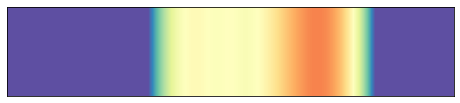

In [134]:
plt.rcParams['font.size'] =14

data = scores[np.newaxis, :]
fig, ax = plt.subplots(figsize=(8,2))
im = ax.imshow(data, vmin=0, vmax=1, cmap=plt.cm.Spectral, aspect=160)


ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
# plt.colorbar(im)
plt.show()

fig.savefig(f'results/slider/d{k}_40.png')

# Opt_slider2

In [300]:
M = 2000
comp = 8 # 3,4,8,25,55,80
nearest = 20
w = 5

x, AA, b = simultaneous_equations(M, comp, nearest, w, param, evaluation)
y = calc_equations(AA, b, method='lu')
datapoint = prepare_datapoint(M, comp, y)
x_norm = normalization(x)

In [301]:
step = np.arange(-10, 10.1, 0.1)
n = len(step)
test = np.zeros((n**2, 8))

for i in range(len(test)):
    test[i,0] = step[i%n]

for j in range(int(np.sqrt(len(test)))):
    test[j*n:j*n+n,1]=step[n-1-j]

In [302]:
test

array([[-10. ,  10. ,   0. , ...,   0. ,   0. ,   0. ],
       [ -9.9,  10. ,   0. , ...,   0. ,   0. ,   0. ],
       [ -9.8,  10. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  9.8, -10. ,   0. , ...,   0. ,   0. ,   0. ],
       [  9.9, -10. ,   0. , ...,   0. ,   0. ,   0. ],
       [ 10. , -10. ,   0. , ...,   0. ,   0. ,   0. ]])

In [303]:
test_norm = normalization2(test, x)
good_scores = estimate_test(comp, x_norm, datapoint, test_norm)
scores = calc_anomaly_score(good_scores)

In [304]:
top = []
low = []
mix = []
labels = []

for i in range(good_scores.shape[0]):
    top.append(test[i])
    labels.append(good_scores[i][0])

top = np.array(top)
labels = np.array(labels)

print(len(top))

40401


In [305]:
data = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        data[i,j] = scores[i*n+j]

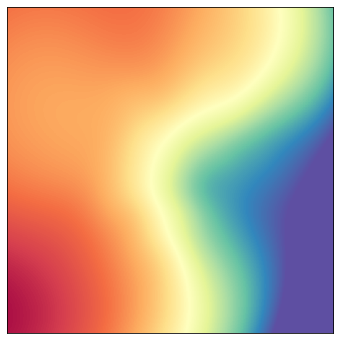

In [306]:
plt.rcParams['font.size'] =14

# data = scores[np.newaxis, :]
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(data, vmin=0, vmax=1, cmap=plt.cm.Spectral)

ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
# plt.colorbar(im)
plt.show()

fig.savefig('results/distribution/A_comp8_d1d2_grid.png')

# Plot images

In [4]:
# images = []
# for i in range(0, 2000):
#     image = cv2.imread('datasets/question-20~20/{0:05d}.png'.format(i))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     images.append(image)

# images  = np.array(images)
# print(images.shape)

images = []

paths = glob.glob('/home/nakamura/yamaha/anomaly_dataset/test/*.png')
paths.sort()
# for path in paths:
#     image = cv2.imread(path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     images.append(image)

In [28]:
test = np.load('questionnaire/param_test2.npy')
x_norm = normalization(x)
test_norm = normalization2(test, x)
good_scores = estimate_test(comp, x_norm, datapoint, test_norm)
scores = calc_anomaly_score(good_scores)

for i in range(test.shape[0]):
    print('{}:{}'.format(i, scores[i]))

0:0.7770565673976746
1:0.9159118737991037
2:0.4404651822694685
3:0.6144127702118658
4:0.683767067018457
5:0.8960243217582384
6:0.44416971096919466
7:0.4511953214439668
8:0.5998324067948557
9:0.7136004977910355
10:0.5826968712998726
11:0.7937999422252
12:0.7251820687531776
13:0.4663092305408437
14:0.5860470637235053
15:0.6058568937029238
16:0.2606353498098475
17:0.36961553877082287
18:0.5645444470025796
19:0.2340414779986255
20:0.5001224639443964
21:0.3991363367692211
22:0.4927920815992881
23:0.3701609069769951
24:0.5116176011392913
25:0.7194906396230145
26:0.6431509776484639
27:0.3136384682224511
28:0.697680786574109
29:0.7813557245613829


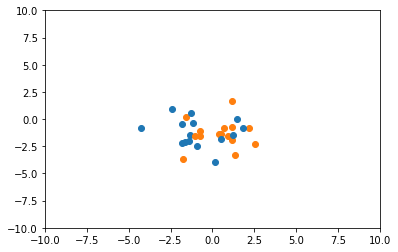

In [68]:
fig, ax = plt.subplots() 
# imscatter(test, paths, ax=ax,  zoom=.1) 
for i in range(15):
    ax.scatter(test[i,0], test[i,1], c='tab:orange')
    ax.scatter(test[i+15,0], test[i+15,1], c='tab:blue')
 
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# plt.savefig('cactus_plot.png',dpi=200, transparent=False)
plt.show() 

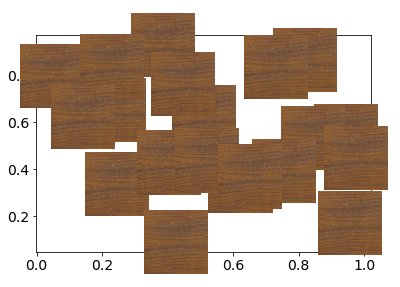

In [206]:
def imscatter(x, y, image, ax=None, zoom=1): 
    if ax is None: 
     ax = plt.gca() 
    try: 
     image = plt.imread(image) 
    except TypeError: 
     # Likely already an array... 
     pass 
    im = OffsetImage(image, zoom=zoom) 
    x, y = np.atleast_1d(x, y) 
    artists = [] 
    for x0, y0 in zip(x, y): 
     ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False) 
     artists.append(ax.add_artist(ab)) 
    ax.update_datalim(np.column_stack([x, y])) 
    ax.autoscale() 
    return artists 

x,y =np.random.rand(2, 20)

image_path = 'cactus5.png' 
fig, ax = plt.subplots() 
imscatter(x, y, image_path, ax=ax,  zoom=.25) 
ax.plot(x, y, 'ko',alpha=0) 
# plt.savefig('cactus_plot.png',dpi=200, transparent=False)
plt.show() 

In [54]:
def imscatter(test, paths, ax=None, zoom=1): 

    artists = [] 
    # for i in range(len(paths)):
    for i in range(15):    
        image = plt.imread(paths[i]) 
        im = OffsetImage(image, zoom=zoom) 
        ab = AnnotationBbox(im, (test[i,0], test[i,1]), xycoords='data', frameon=False) 
        artists.append(ax.add_artist(ab)) 
    ax.autoscale() 
    return artists 

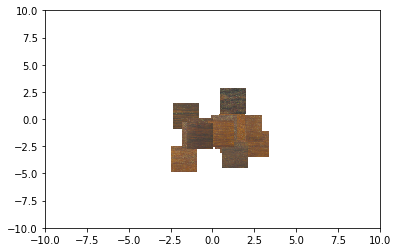

In [55]:
fig, ax = plt.subplots() 
imscatter(test, paths, ax=ax,  zoom=.1) 
ax.plot(test[:,0], test[:,1], 'ko',alpha=0) 
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# plt.savefig('cactus_plot.png',dpi=200, transparent=False)
plt.show() 

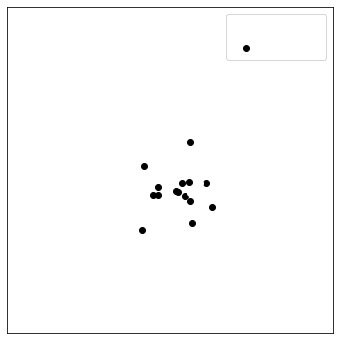

In [48]:
fig, ax = plt.subplots(figsize=(8,6)) 
fig.patch.set_facecolor('white')

# imscatter(test, paths, ax=ax,  zoom=.1) 
# ax.plot(test[:,0], test[:,1], 'ko',alpha=0) 

for i in range(15):
    if(i==0):
        ax.scatter(test[i+15,0], test[i+15,1], c='w', label='    ')
        ax.scatter(test[i,0], test[i,1], c='k',label='           ')
    else:
        ax.scatter(test[i+15,0], test[i+15,1], c='w')
        ax.scatter(test[i,0], test[i,1], c='k')
        
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# plt.savefig('cactus_plot.png',dpi=200, transparent=False)

im = Image.open('/home/nakamura/ganspace/results/distribution/B_comp8_d1d2_grid.png')
ax.imshow(im)

ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)

ax.legend()

plt.savefig('/home/nakamura/ganspace/results/distribution/d1d2_point.png', transparent=True)
plt.show()

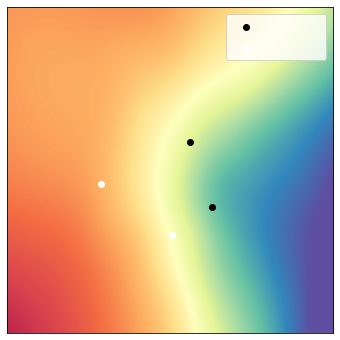

In [33]:
fig, ax = plt.subplots(figsize=(8,6)) 
fig.patch.set_facecolor('white')

# imscatter(test, paths, ax=ax,  zoom=.1) 
# ax.plot(test[:,0], test[:,1], 'ko',alpha=0) 

# for i in range(15):
#     ax.scatter(test[i,0], test[i,1], c='tab:orange')
#     ax.scatter(test[i+15,0], test[i+15,1], c='tab:blue')

# 0, 10, 15, 19
ax.scatter(test[0,0], test[0,1], c='k',label='           ')
ax.scatter(test[10,0], test[10,1], c='k')
ax.scatter(test[15,0], test[15,1], c='w',label='           ')
ax.scatter(test[19,0], test[19,1], c='w')


plt.xlim(-10, 10)
plt.ylim(-10, 10)

im = Image.open('/home/nakamura/ganspace/results/distribution/A_comp8_d1d2_grid.png')
ax.imshow(im, extent=[*(-20, 20),  *(-20, 20)])

ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)
ax.legend()


plt.savefig('/home/nakamura/ganspace/results/distribution/A_comp8_d1d2_grid_point.png', transparent=False)
plt.show()

## PCA

In [ ]:
pca = PCA(n_components=2, whiten=False)
pca.fit(test)
top_pca = pca.transform(top)

In [ ]:
# color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black']
color = ['black', 'tab:gray', 'tab:brown',  'tab:purple', 'tab:blue', 'tab:cyan','tab:green', 'tab:olive', 'tab:orange', 'tab:red', 'tab:pink']
for i in range(len(top_pca)):
    plt.scatter(top_pca[i,0], top_pca[i,1], c=color[int(labels[i])])
plt.xlabel('comp 1')
plt.ylabel('comp 2')
plt.xlim(-25, 25)
plt.ylim(-10, 10)
# plt.savefig('results/distribution/C_comp80.png')
plt.show()

## k-means

In [ ]:
labels = KMeans(n_clusters=2).fit_predict(top)

for i in range(len(top_pca)):
    plt.scatter(top_pca[i,0], top_pca[i,1], c=color[int(labels[i])])
plt.show()

## X-means

In [ ]:
xmeans_instance = xmeans.xmeans(top).process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

labels_size = len(list(itertools.chain.from_iterable(clusters)))
labels = np.zeros((1, labels_size))

for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

print(labels.max()+1)

for i in range(len(top_pca)):
    plt.scatter(top_pca[i,0], top_pca[i,1], c=color[int(labels[i])])
plt.show()

## G-means

In [ ]:
gmeans_instance = gmeans.gmeans(top).process()

clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()

labels_size = len(
    list(itertools.chain.from_iterable(clusters))
)


labels = np.zeros((1, labels_size))
for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

print(labels.max()+1)

for i in range(len(top_pca)):
    plt.scatter(top_pca[i,0], top_pca[i,1], c=color[int(labels[i])])
plt.show()

In [ ]:
n_components = 2
pca = PCA(n_components, whiten=False)
pca.fit(mix)
mix_pca = pca.transform(mix)
plt.scatter(mix_pca[:,0],mix_pca[:,1])

plt.show()

# Plot hist

In [ ]:
evaluation = np.array(df.iloc[:, 2], dtype='float32')
print(evaluation)

In [ ]:
plt.hist(evaluation, range=(0, 6), bins=5, alpha=0.5, ec='navy')
plt.grid(axis='y', alpha=0.5)
plt.ylim(0, 550)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.savefig('results/figure/hist_C.png')
plt.show()